In [ ]:
# Exploratory Data Analyses and Data Visualization of 2016 ebay Car Sales in Germany 



> # Exploratory Data Analyses and Data Visualization of 2016 ebay Car Sales in Germany Using Python and Business Inteligence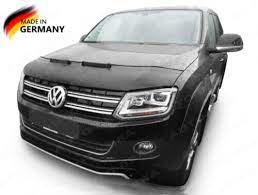
[Source of Picture](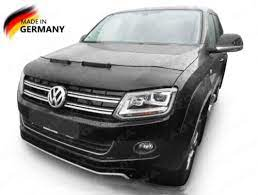)

## Mid-term-Project For the March 2023 Ironhack, Berlin By Evans and Festus 
## Dataset: Auto Sales ebay Germany Random 50k!

##  Table of Contents
1. [Description of the dataset](#2)

1. [Goals of the project¶](#3)

2. [Data Gathering and Methodology](#4)
   
3. [Data Analytics and Conclusion](#5) 
   
4. [References](#6)

#  Description of the dataset
The dataset used to complete this project was scraped in 2016 from ebay-Kleinanzeigan (Germany).
The data was made available publicly on the Kaggle by the user 'orgesleka'. 

The dataset contains seventeen columns with over 37 thousand rows of private used car listings for sale; 
the column headings and their descriptions are listed here:

**date_crawled:** When an ad was first crawled; all field-values are taken from this date.
name: Name of the car.

**price_EUR:** Listed price for the car.

**ab_test:** Whether the listing is included in an A/B test.

**vehicle_type:** The vehicle type.

**registration_year:** The year the car was first registered.

**transmission:** The transmission type.

**power_ps:** The power of the car in PS (PferdStarkeis, similar to horse power).

**model:** Car model name.

**odometer_km:** approximate kilometers the car has driven.

**registration_month:** The month the car was first registered.

**fuel_type:** Vehicle fuel type.

**brand:** Car brand.

**unrepaired_damage:** If the car has damage which is not yet repaired.

**date_created:** The date the eBay listing was created.

**postal_code:** The postal code for the location of the vehicle.

**last_seen_online:** When the crawler saw this ad last online.


# Goals of the project
## **Do data cleaning:**
    - identify and remove where applicable the outliers, missing data, duplicates, columns to drop
    - decide on the interesting features to keep
## **Carry out EDA and provide dataset summary:** 
    - Mean prices
    - max prices 
    - mode i.e most frequent car model
## **Investigate the underlying patterns and data structure:** 
    - Commonly listed brands
    - distribution of brands?
    - price variation between: 
        - relatively newer cars and older cars
        - fuel type
        - transmission type
        - car brands
        - mileage of the car
        - unrepaired_damage
    - correlations between the numerical features:
        - Price
        - power_ps 
        - mileage in Km
## **Assess the impact of Ab Testing:**
    - Viewership of the cars
## **Business Inteligence - Build a Tableau Dashboard:**
    - Are their any meaningful KPIs?
    - show impact of AB testing of such KPI.
    - comparing the transmission types, fuel types brands and prices
    - filter by top 3 model, brand, fuel types etc 
    - show an important insight/pattern about the sale of cars
    - design a clean and well readable charts that have titles, labels etc. 
## **Reveal the bigger picture:** 
     - Relate the data to the opportunity for sellers and buyers.
     - Recommnedation about the AB testing whether to launch or not to launch it.
     - Conclusion.

# Data Gathering and Methodology

1. Python libraries below will be used for EDA and for data wrangling. 
1. Dataset is publicly available in [kaggle](https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned) in the format comma-separated value (CSV) file, a tabular format contained in [a zipped file](https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned/download?datasetVersionNumber=1)

1. Tableau will be used for visualizations and Dashboard design. 



## Loading the libraries and modules

In [265]:
# import libraries 
# data cleaning
import pandas as pd
import numpy as np
#import datetime as dt
#import os
#from scipy import stats

#from requests.auth import HTTPBasicAuth
#from zipfile import ZipFile
#import io

#data visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

#visualazation libraries
#import plotly.express as px
#import plotly.offline as pyo
#import plotly.graph_objs as go
# Set notebook mode to work in offline
#pyo.init_notebook_mode()




## Loading Data


In [266]:
#dataset
#df = pd.read_csv('https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned/download?datasetVersionNumber=1.zip',compression='zip')
#https://www.kaggle.com/datasets/tjelailah/ebay-car-sales-data
#https://www.kaggle.com/datasets/tjelailah/ebay-car-sales-data/download?datasetVersionNumber=1
#https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen
#df = pd.read_csv('autos_random_50k_cleaned.csv')
#df = pd.read_csv('autos_random_50k.csv', encoding = 'ISO-8859-1')
df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')
#df = pd.read_csv("https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen.csv", encoding = 'ISO-8859-1')
#print(df)

df

dateCrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
0       privat   Angebot    480     test         NaN                1993   
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
...        ...       ...    ...      ...         ...                 ...   
371523  privat   Angebot   2200     test         NaN                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
0         manuell        0         golf     150000                    0   
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
...           ...      ...          ...        ...                  ...   
371523        NaN        0          NaN      20000                    1   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType           brand notRepairedDamage          dateCreated  \
0        benzin      volkswagen               NaN  2016-03-24 00:00:00   
1        diesel            audi                ja  2016-03-24 00:00:00   
2        diesel            jeep               NaN  2016-03-14 00:00:00   
3        benzin      volkswagen              nein  2016-03-17 00:00:00   
4        diesel           skoda              nein  2016-03-31 00:00:00   
...         ...             ...               ...                  ...   
371523      NaN  sonstige_autos               NaN  2016-03-14 00:00:00   
371524   benzin           smart              nein  2016-03-05 00:00:00   
371525   diesel      volkswagen              nein  2016-03-19 00:00:00   
371526   diesel      volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin             bmw              nein  2016-03-07 00:00:00   

        nrOfPictures  postalCode             lastSeen  
0                  0       70435  2016-04-07 03:16:57  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
...              ...         ...                  ..

In [267]:
df.describe()

price  yearOfRegistration        powerPS      kilometer  \
count  3.715280e+05       371528.000000  371528.000000  371528.000000   
mean   1.729514e+04         2004.577997     115.549477  125618.688228   
std    3.587954e+06           92.866598     192.139578   40112.337051   
min    0.000000e+00         1000.000000       0.000000    5000.000000   
25%    1.150000e+03         1999.000000      70.000000  125000.000000   
50%    2.950000e+03         2003.000000     105.000000  150000.000000   
75%    7.200000e+03         2008.000000     150.000000  150000.000000   
max    2.147484e+09         9999.000000   20000.000000  150000.000000   

       monthOfRegistration  nrOfPictures    postalCode  
count        371528.000000      371528.0  371528.00000  
mean              5.734445           0.0   50820.66764  
std               3.712412           0.0   25799.08247  
min               0.000000           0.0    1067.00000  
25%               3.000000           0.0   30459.00000  
50%               6.000000           0.0   49610.00000  
75%               9.000000           0.0   71546.00000  
max              12.000000           0.0   99998.00000

In [268]:
df.shape

(371528, 20)

<a id = "3"></a><br>

## Data Wrangling

1. We drop the first column **'unnamed'**:
1. Standardize the column names e.g price should all be in lower case
1. Convert the German words to english e.g transmission column
1. Remove Nan values
1. Remove duplicates
1. Review the regsitration year and prices of vehicles


  

In [269]:
#Drop the first column 'unnamed'
#df=df.drop(df.columns[0], axis=1)
#df

In [270]:
#replace EUR with "eur" or change to lower case
df.columns = df.columns.str.lower()#df.columns = df.columns.str.replace("EUR", "eur")
df

datecrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offertype  price   abtest vehicletype  yearofregistration  \
0       privat   Angebot    480     test         NaN                1993   
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
...        ...       ...    ...      ...         ...                 ...   
371523  privat   Angebot   2200     test         NaN                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerps        model  kilometer  monthofregistration  \
0         manuell        0         golf     150000                    0   
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
...           ...      ...          ...        ...                  ...   
371523        NaN        0          NaN      20000                    1   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fueltype           brand notrepaireddamage          datecreated  \
0        benzin      volkswagen               NaN  2016-03-24 00:00:00   
1        diesel            audi                ja  2016-03-24 00:00:00   
2        diesel            jeep               NaN  2016-03-14 00:00:00   
3        benzin      volkswagen              nein  2016-03-17 00:00:00   
4        diesel           skoda              nein  2016-03-31 00:00:00   
...         ...             ...               ...                  ...   
371523      NaN  sonstige_autos               NaN  2016-03-14 00:00:00   
371524   benzin           smart              nein  2016-03-05 00:00:00   
371525   diesel      volkswagen              nein  2016-03-19 00:00:00   
371526   diesel      volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin             bmw              nein  2016-03-07 00:00:00   

        nrofpictures  postalcode             lastseen  
0                  0       70435  2016-04-07 03:16:57  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
...              ...         ...                  ..

In [271]:
df.columns

Index(['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'yearofregistration', 'gearbox', 'powerps', 'model',
       'kilometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [272]:
#Rename columns with list
column_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price_eur', 'ab_test',
       'vehicle_type', 'year_registration', 'transmission', 'power_hp', 'model',
       'mileage_km', 'month_registration', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'number_pictures', 'postal_code',
       'last_seen']
df.columns = column_names
df

date_crawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offer_type  price_eur  ab_test vehicle_type  year_registration  \
0       privat    Angebot        480     test          NaN               1993   
1       privat    Angebot      18300     test        coupe               2011   
2       privat    Angebot       9800     test          suv               2004   
3       privat    Angebot       1500     test   kleinwagen               2001   
4       privat    Angebot       3600     test   kleinwagen               2008   
...        ...        ...        ...      ...          ...                ...   
371523  privat    Angebot       2200     test          NaN               2005   
371524  privat    Angebot       1199     test       cabrio               2000   
371525  privat    Angebot       9200     test          bus               1996   
371526  privat    Angebot       3400     test        kombi               2002   
371527  privat    Angebot      28990  control    limousine               2013   

       transmission  power_hp        model  mileage_km  month_registration  \
0           manuell         0         golf      150000                   0   
1           manuell       190          NaN      125000                   5   
2         automatik       163        grand      125000                   8   
3           manuell        75         golf      150000                   6   
4           manuell        69        fabia       90000                   7   
...             ...       ...          ...         ...                 ...   
371523          NaN         0          NaN       20000                   1   
371524    automatik       101       fortwo      125000                   3   
371525      manuell       102  transporter      150000                   3   
371526      manuell       100         golf      150000                   6   
371527      manuell       320      m_reihe       50000                   8   

       fuel_type           brand unrepaired_damage         date_created  \
0         benzin      volkswagen               NaN  2016-03-24 00:00:00   
1         diesel            audi                ja  2016-03-24 00:00:00   
2         diesel            jeep               NaN  2016-03-14 00:00:00   
3         benzin      volkswagen              nein  2016-03-17 00:00:00   
4         diesel           skoda              nein  2016-03-31 00:00:00   
...          ...             ...               ...                  ...   
371523       NaN  sonstige_autos               NaN  2016-03-14 00:00:00   
371524    benzin           smart              nein  2016-03-05 00:00:00   
371525    diesel      volkswagen              nein  2016-03-19 00:00:00   
371526    diesel      volkswagen               NaN  2016-03-20 00:00:00   
371527    benzin             bmw              nein  2016-03-07 00:00:00   

        number_pictures  postal_code            last_seen  
0                     0        70435  2016-04-07 03:16:57  
1                     0        66954  2016-04-07 01:46:50  
2                     0        90480  2016-04-05 12:47:46  
3                     0        91074  2

In [273]:
#drop duplicates
df = df.drop_duplicates()
df


date_crawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offer_type  price_eur  ab_test vehicle_type  year_registration  \
0       privat    Angebot        480     test          NaN               1993   
1       privat    Angebot      18300     test        coupe               2011   
2       privat    Angebot       9800     test          suv               2004   
3       privat    Angebot       1500     test   kleinwagen               2001   
4       privat    Angebot       3600     test   kleinwagen               2008   
...        ...        ...        ...      ...          ...                ...   
371523  privat    Angebot       2200     test          NaN               2005   
371524  privat    Angebot       1199     test       cabrio               2000   
371525  privat    Angebot       9200     test          bus               1996   
371526  privat    Angebot       3400     test        kombi               2002   
371527  privat    Angebot      28990  control    limousine               2013   

       transmission  power_hp        model  mileage_km  month_registration  \
0           manuell         0         golf      150000                   0   
1           manuell       190          NaN      125000                   5   
2         automatik       163        grand      125000                   8   
3           manuell        75         golf      150000                   6   
4           manuell        69        fabia       90000                   7   
...             ...       ...          ...         ...                 ...   
371523          NaN         0          NaN       20000                   1   
371524    automatik       101       fortwo      125000                   3   
371525      manuell       102  transporter      150000                   3   
371526      manuell       100         golf      150000                   6   
371527      manuell       320      m_reihe       50000                   8   

       fuel_type           brand unrepaired_damage         date_created  \
0         benzin      volkswagen               NaN  2016-03-24 00:00:00   
1         diesel            audi                ja  2016-03-24 00:00:00   
2         diesel            jeep               NaN  2016-03-14 00:00:00   
3         benzin      volkswagen              nein  2016-03-17 00:00:00   
4         diesel           skoda              nein  2016-03-31 00:00:00   
...          ...             ...               ...                  ...   
371523       NaN  sonstige_autos               NaN  2016-03-14 00:00:00   
371524    benzin           smart              nein  2016-03-05 00:00:00   
371525    diesel      volkswagen              nein  2016-03-19 00:00:00   
371526    diesel      volkswagen               NaN  2016-03-20 00:00:00   
371527    benzin             bmw              nein  2016-03-07 00:00:00   

        number_pictures  postal_code            last_seen  
0                     0        70435  2016-04-07 03:16:57  
1                     0        66954  2016-04-07 01:46:50  
2                     0        90480  2016-04-05 12:47:46  
3                     0        91074  2

In [274]:
df['transmission'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [275]:
#drop missing values
df=df.dropna(subset=['transmission'])
df

date_crawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371522  2016-03-21 09:50:58                               Mitsubishi_Cold   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offer_type  price_eur  ab_test vehicle_type  year_registration  \
0       privat    Angebot        480     test          NaN               1993   
1       privat    Angebot      18300     test        coupe               2011   
2       privat    Angebot       9800     test          suv               2004   
3       privat    Angebot       1500     test   kleinwagen               2001   
4       privat    Angebot       3600     test   kleinwagen               2008   
...        ...        ...        ...      ...          ...                ...   
371522  privat    Angebot          0  control          NaN               2005   
371524  privat    Angebot       1199     test       cabrio               2000   
371525  privat    Angebot       9200     test          bus               1996   
371526  privat    Angebot       3400     test        kombi               2002   
371527  privat    Angebot      28990  control    limousine               2013   

       transmission  power_hp        model  mileage_km  month_registration  \
0           manuell         0         golf      150000                   0   
1           manuell       190          NaN      125000                   5   
2         automatik       163        grand      125000                   8   
3           manuell        75         golf      150000                   6   
4           manuell        69        fabia       90000                   7   
...             ...       ...          ...         ...                 ...   
371522      manuell         0         colt      150000                   7   
371524    automatik       101       fortwo      125000                   3   
371525      manuell       102  transporter      150000                   3   
371526      manuell       100         golf      150000                   6   
371527      manuell       320      m_reihe       50000                   8   

       fuel_type       brand unrepaired_damage         date_created  \
0         benzin  volkswagen               NaN  2016-03-24 00:00:00   
1         diesel        audi                ja  2016-03-24 00:00:00   
2         diesel        jeep               NaN  2016-03-14 00:00:00   
3         benzin  volkswagen              nein  2016-03-17 00:00:00   
4         diesel       skoda              nein  2016-03-31 00:00:00   
...          ...         ...               ...                  ...   
371522    benzin  mitsubishi                ja  2016-03-21 00:00:00   
371524    benzin       smart              nein  2016-03-05 00:00:00   
371525    diesel  volkswagen              nein  2016-03-19 00:00:00   
371526    diesel  volkswagen               NaN  2016-03-20 00:00:00   
371527    benzin         bmw              nein  2016-03-07 00:00:00   

        number_pictures  postal_code            last_seen  
0                     0        70435  2016-04-07 03:16:57  
1                     0        66954  2016-04-07 01:46:50  
2                     0        90480  2016-04-05 12:47:46  
3                     0        91074  2016-03-17 17:40:17  
4                     0    

In [276]:
df['transmission'].unique()

array(['manuell', 'automatik'], dtype=object)

In [277]:
#Transmission - Standardize - translate German to English
df.loc[df['transmission'].str.contains('manuell'),"transmission"] = 'manual'
df.loc[df['transmission'].str.contains('automatik'),"transmission"] = 'automatic'
#df.loc[df['transmission'].str.contains('Unknown'),"transmission"] = 'unknown'
df


date_crawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371522  2016-03-21 09:50:58                               Mitsubishi_Cold   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offer_type  price_eur  ab_test vehicle_type  year_registration  \
0       privat    Angebot        480     test          NaN               1993   
1       privat    Angebot      18300     test        coupe               2011   
2       privat    Angebot       9800     test          suv               2004   
3       privat    Angebot       1500     test   kleinwagen               2001   
4       privat    Angebot       3600     test   kleinwagen               2008   
...        ...        ...        ...      ...          ...                ...   
371522  privat    Angebot          0  control          NaN               2005   
371524  privat    Angebot       1199     test       cabrio               2000   
371525  privat    Angebot       9200     test          bus               1996   
371526  privat    Angebot       3400     test        kombi               2002   
371527  privat    Angebot      28990  control    limousine               2013   

       transmission  power_hp        model  mileage_km  month_registration  \
0            manual         0         golf      150000                   0   
1            manual       190          NaN      125000                   5   
2         automatic       163        grand      125000                   8   
3            manual        75         golf      150000                   6   
4            manual        69        fabia       90000                   7   
...             ...       ...          ...         ...                 ...   
371522       manual         0         colt      150000                   7   
371524    automatic       101       fortwo      125000                   3   
371525       manual       102  transporter      150000                   3   
371526       manual       100         golf      150000                   6   
371527       manual       320      m_reihe       50000                   8   

       fuel_type       brand unrepaired_damage         date_created  \
0         benzin  volkswagen               NaN  2016-03-24 00:00:00   
1         diesel        audi                ja  2016-03-24 00:00:00   
2         diesel        jeep               NaN  2016-03-14 00:00:00   
3         benzin  volkswagen              nein  2016-03-17 00:00:00   
4         diesel       skoda              nein  2016-03-31 00:00:00   
...          ...         ...               ...                  ...   
371522    benzin  mitsubishi                ja  2016-03-21 00:00:00   
371524    benzin       smart              nein  2016-03-05 00:00:00   
371525    diesel  volkswagen              nein  2016-03-19 00:00:00   
371526    diesel  volkswagen               NaN  2016-03-20 00:00:00   
371527    benzin         bmw              nein  2016-03-07 00:00:00   

        number_pictures  postal_code            last_seen  
0                     0        70435  2016-04-07 03:16:57  
1                     0        66954  2016-04-07 01:46:50  
2                     0        90480  2016-04-05 12:47:46  
3                     0        91074  2016-03-17 17:40:17  
4                     0    

In [278]:
#unrepaired_damage
df['unrepaired_damage'].unique()

array([nan, 'ja', 'nein'], dtype=object)

In [279]:
#drop missing values
df=df.dropna(subset=['unrepaired_damage'])
df

date_crawled  \
1       2016-03-24 10:58:45   
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
...                     ...   
371521  2016-03-27 20:36:20   
371522  2016-03-21 09:50:58   
371524  2016-03-05 19:56:21   
371525  2016-03-19 18:57:12   
371527  2016-03-07 19:39:19   

                                                     name  seller offer_type  \
1                                    A5_Sportback_2.7_Tdi  privat    Angebot   
3                                      GOLF_4_1_4__3TÜRER  privat    Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    Angebot   
6                             Peugeot_206_CC_110_Platinum  privat    Angebot   
...                                                   ...     ...        ...   
371521                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat    Angebot   
371522                                    Mitsubishi_Cold  privat    Angebot   
371524              Smart_smart_leistungssteigerung_100ps  privat    Angebot   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat    Angebot   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat    Angebot   

        price_eur  ab_test vehicle_type  year_registration transmission  \
1           18300     test        coupe               2011       manual   
3            1500     test   kleinwagen               2001       manual   
4            3600     test   kleinwagen               2008       manual   
5             650     test    limousine               1995       manual   
6            2200     test       cabrio               2004       manual   
...           ...      ...          ...                ...          ...   
371521       1150  control          bus               2000       manual   
371522          0  control          NaN               2005       manual   
371524       1199     test       cabrio               2000    automatic   
371525       9200     test          bus               1996       manual   
371527      28990  control    limousine               2013       manual   

        power_hp        model  mileage_km  month_registration fuel_type  \
1            190          NaN      125000                   5    diesel   
3             75         golf      150000                   6    benzin   
4             69        fabia       90000                   7    diesel   
5            102          3er      150000                  10    benzin   
6            109      2_reihe      150000                   8    benzin   
...          ...          ...         ...                 ...       ...   
371521         0       zafira      150000                   3    benzin   
371522         0         colt      150000                   7    benzin   
371524       101       fortwo      125000                   3    benzin   
371525       102  transporter      150000                   3    diesel   
371527       320      m_reihe       50000                   8    benzin   

             brand unrepaired_damage         date_created  number_pictures  \
1             audi                ja  2016-03-24 00:00:00                0   
3       volkswagen              nein  2016-03-17 00:00:00                0   
4            skoda              nein  2016-03-31 00:00:00                0   
5              bmw                ja  2016-04-04 00:00:00                0   
6          peugeot              nein  2016-04-01 00:00:00                0   
...            ...               ...                  ...              ...   
371521        opel              nein  2016-03-27 00:00:00                0   
371522  mitsubishi                ja  2016-03-21 00:00:00                0   
371524       smart              nein  2016-03-05 00:00:00                0   
371525  volkswagen              nein  2016-03-19 00:00:00                0   
371527         bmw   

In [280]:
#unrepaired_damage: Standardize - translate German to English
df.loc[df['unrepaired_damage'].str.contains('nein'),"unrepaired_damage"] = 'no'
df.loc[df['unrepaired_damage'].str.contains('ja'),"unrepaired_damage"] = 'yes'
#df.loc[df['unrepaired_damage'].str.contains('nan'),"unrepaired_damage"] = 'unknown'
df

date_crawled  \
1       2016-03-24 10:58:45   
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
...                     ...   
371521  2016-03-27 20:36:20   
371522  2016-03-21 09:50:58   
371524  2016-03-05 19:56:21   
371525  2016-03-19 18:57:12   
371527  2016-03-07 19:39:19   

                                                     name  seller offer_type  \
1                                    A5_Sportback_2.7_Tdi  privat    Angebot   
3                                      GOLF_4_1_4__3TÜRER  privat    Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    Angebot   
6                             Peugeot_206_CC_110_Platinum  privat    Angebot   
...                                                   ...     ...        ...   
371521                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat    Angebot   
371522                                    Mitsubishi_Cold  privat    Angebot   
371524              Smart_smart_leistungssteigerung_100ps  privat    Angebot   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat    Angebot   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat    Angebot   

        price_eur  ab_test vehicle_type  year_registration transmission  \
1           18300     test        coupe               2011       manual   
3            1500     test   kleinwagen               2001       manual   
4            3600     test   kleinwagen               2008       manual   
5             650     test    limousine               1995       manual   
6            2200     test       cabrio               2004       manual   
...           ...      ...          ...                ...          ...   
371521       1150  control          bus               2000       manual   
371522          0  control          NaN               2005       manual   
371524       1199     test       cabrio               2000    automatic   
371525       9200     test          bus               1996       manual   
371527      28990  control    limousine               2013       manual   

        power_hp        model  mileage_km  month_registration fuel_type  \
1            190          NaN      125000                   5    diesel   
3             75         golf      150000                   6    benzin   
4             69        fabia       90000                   7    diesel   
5            102          3er      150000                  10    benzin   
6            109      2_reihe      150000                   8    benzin   
...          ...          ...         ...                 ...       ...   
371521         0       zafira      150000                   3    benzin   
371522         0         colt      150000                   7    benzin   
371524       101       fortwo      125000                   3    benzin   
371525       102  transporter      150000                   3    diesel   
371527       320      m_reihe       50000                   8    benzin   

             brand unrepaired_damage         date_created  number_pictures  \
1             audi               yes  2016-03-24 00:00:00                0   
3       volkswagen                no  2016-03-17 00:00:00                0   
4            skoda                no  2016-03-31 00:00:00                0   
5              bmw               yes  2016-04-04 00:00:00                0   
6          peugeot                no  2016-04-01 00:00:00                0   
...            ...               ...                  ...              ...   
371521        opel                no  2016-03-27 00:00:00                0   
371522  mitsubishi               yes  2016-03-21 00:00:00                0   
371524       smart                no  2016-03-05 00:00:00                0   
371525  volkswagen                no  2016-03-19 00:00:00                0   
371527         bmw   

In [281]:
df['date_crawled'].min()

'2016-03-05 14:06:22'

In [282]:
df['date_crawled'].max()

'2016-04-07 14:36:58'

In [283]:
df['date_crawled'].mode()

0    2016-03-24 14:49:47
Name: date_crawled, dtype: object

In [284]:
df['ab_test'].unique()

array(['test', 'control'], dtype=object)

In [285]:
df['vehicle_type'].unique()#['cabrio', 'kleinwagen', 'suv', 'kombi', 'limousine', 'coupe','bus', 'andere', 'Unknown']

array(['coupe', 'kleinwagen', 'limousine', 'cabrio', 'kombi', 'suv',
       'bus', nan, 'andere'], dtype=object)

In [286]:
#drop missing values
#df=df.dropna(subset=['vehicle_type'])
#df

#May be we should cjhange these NaN to unknown
df.loc[df['vehicle_type'].str.contains('andere'),"vehicle_type"] = 'other'
df.loc[df['vehicle_type'].str.contains('kleinwagen'),"vehicle_type"] = 'small_car'
df.loc[df['vehicle_type'].str.contains(''),"vehicle_type"] = 'unknown'

df

date_crawled  \
1       2016-03-24 10:58:45   
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
...                     ...   
371520  2016-03-19 19:53:49   
371521  2016-03-27 20:36:20   
371524  2016-03-05 19:56:21   
371525  2016-03-19 18:57:12   
371527  2016-03-07 19:39:19   

                                                     name  seller offer_type  \
1                                    A5_Sportback_2.7_Tdi  privat    Angebot   
3                                      GOLF_4_1_4__3TÜRER  privat    Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    Angebot   
6                             Peugeot_206_CC_110_Platinum  privat    Angebot   
...                                                   ...     ...        ...   
371520                                       turbo_defekt  privat    Angebot   
371521                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat    Angebot   
371524              Smart_smart_leistungssteigerung_100ps  privat    Angebot   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat    Angebot   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat    Angebot   

        price_eur  ab_test vehicle_type  year_registration transmission  \
1           18300     test        coupe               2011       manual   
3            1500     test   kleinwagen               2001       manual   
4            3600     test   kleinwagen               2008       manual   
5             650     test    limousine               1995       manual   
6            2200     test       cabrio               2004       manual   
...           ...      ...          ...                ...          ...   
371520       3200  control    limousine               2004       manual   
371521       1150  control          bus               2000       manual   
371524       1199     test       cabrio               2000    automatic   
371525       9200     test          bus               1996       manual   
371527      28990  control    limousine               2013       manual   

        power_hp        model  mileage_km  month_registration fuel_type  \
1            190          NaN      125000                   5    diesel   
3             75         golf      150000                   6    benzin   
4             69        fabia       90000                   7    diesel   
5            102          3er      150000                  10    benzin   
6            109      2_reihe      150000                   8    benzin   
...          ...          ...         ...                 ...       ...   
371520       225         leon      150000                   5    benzin   
371521         0       zafira      150000                   3    benzin   
371524       101       fortwo      125000                   3    benzin   
371525       102  transporter      150000                   3    diesel   
371527       320      m_reihe       50000                   8    benzin   

             brand unrepaired_damage         date_created  number_pictures  \
1             audi               yes  2016-03-24 00:00:00                0   
3       volkswagen                no  2016-03-17 00:00:00                0   
4            skoda                no  2016-03-31 00:00:00                0   
5              bmw               yes  2016-04-04 00:00:00                0   
6          peugeot                no  2016-04-01 00:00:00                0   
...            ...               ...                  ...              ...   
371520        seat               yes  2016-03-19 00:00:00                0   
371521        opel                no  2016-03-27 00:00:00                0   
371524       smart                no  2016-03-05 00:00:00                0   
371525  volkswagen                no  2016-03-19 00:00:00                0   
371527         bmw   

date_crawled  \
1       2016-03-24 10:58:45   
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
...                     ...   
371520  2016-03-19 19:53:49   
371521  2016-03-27 20:36:20   
371524  2016-03-05 19:56:21   
371525  2016-03-19 18:57:12   
371527  2016-03-07 19:39:19   

                                                     name  seller offer_type  \
1                                    A5_Sportback_2.7_Tdi  privat    Angebot   
3                                      GOLF_4_1_4__3TÜRER  privat    Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    Angebot   
6                             Peugeot_206_CC_110_Platinum  privat    Angebot   
...                                                   ...     ...        ...   
371520                                       turbo_defekt  privat    Angebot   
371521                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat    Angebot   
371524              Smart_smart_leistungssteigerung_100ps  privat    Angebot   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat    Angebot   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat    Angebot   

        price_eur  ab_test vehicle_type  year_registration transmission  \
1           18300     test        coupe               2011       manual   
3            1500     test   kleinwagen               2001       manual   
4            3600     test   kleinwagen               2008       manual   
5             650     test    limousine               1995       manual   
6            2200     test       cabrio               2004       manual   
...           ...      ...          ...                ...          ...   
371520       3200  control    limousine               2004       manual   
371521       1150  control          bus               2000       manual   
371524       1199     test       cabrio               2000    automatic   
371525       9200     test          bus               1996       manual   
371527      28990  control    limousine               2013       manual   

        power_hp        model  mileage_km  month_registration fuel_type  \
1            190          NaN      125000                   5    diesel   
3             75         golf      150000                   6    benzin   
4             69        fabia       90000                   7    diesel   
5            102          3er      150000                  10    benzin   
6            109      2_reihe      150000                   8    benzin   
...          ...          ...         ...                 ...       ...   
371520       225         leon      150000                   5    benzin   
371521         0       zafira      150000                   3    benzin   
371524       101       fortwo      125000                   3    benzin   
371525       102  transporter      150000                   3    diesel   
371527       320      m_reihe       50000                   8    benzin   

             brand unrepaired_damage         date_created  number_pictures  \
1             audi               yes  2016-03-24 00:00:00                0   
3       volkswagen                no  2016-03-17 00:00:00                0   
4            skoda                no  2016-03-31 00:00:00                0   
5              bmw               yes  2016-04-04 00:00:00                0   
6          peugeot                no  2016-04-01 00:00:00                0   
...            ...               ...                  ...              ...   
371520        seat               yes  2016-03-19 00:00:00                0   
371521        opel                no  2016-03-27 00:00:00                0   
371524       smart                no  2016-03-05 00:00:00                0   
371525  volkswagen                no  2016-03-19 00:00:00                0   
371527         bmw   

In [288]:
#df['registration_year'].unique()#
df['year_registration'].unique()

array([2011, 2001, 2008, 1995, 2004, 1980, 2005, 2007, 2009, 2002, 1997,
       1990, 1981, 2003, 1984, 1999, 1998, 2012, 2014, 2006, 2010, 2000,
       1993, 2013, 1994, 1992, 1991, 1996, 1989, 2015, 1968, 1983, 1959,
       1973, 1969, 1971, 1987, 1988, 1967, 2016, 1986, 1985, 1965, 1945,
       1974, 1979, 1982, 1978, 1976, 1972, 1977, 1961, 1963, 1964, 1966,
       1975, 1970, 1937, 1936, 1954, 1955, 1933, 1941, 1962, 1960, 1951,
       1910, 1940, 1953, 1935, 1957, 1958, 1956, 2017, 1950, 1948, 1932,
       1952, 1923, 1931, 2018, 1949, 1942, 1911, 1929, 1930, 1943, 1938,
       1934, 1919, 1947, 1939, 1946, 1944])

In [289]:
df['year_registration'].min()

1910

In [290]:
df['year_registration'].max()

2018

In [291]:
df['year_registration'].mode()

0    1999
Name: year_registration, dtype: int64

In [292]:
df['year_registration'].mean()

2003.082621597493

In [293]:
df['power_hp'].unique()

array([  190,    75,    69,   102,   109,    50,   105,   140,   131,
         136,   160,   231,   118,   193,    99,    60,   113,   218,
         122,   129,    70,    95,   177,     0,   306,    61,   101,
         232,   156,    80,    82,   204,   155,    54,   150,    87,
          86,   143,    84,   303,   125,   224,   235,   200,   178,
         265,   163,    77,   110,   144,   120,   286,   170,   116,
         184,   126,    88,    64,   305,   197,   179,    90,   250,
         313,    45,    98,   115,   130,   114,   211,    56,   326,
         201,   213,   107,   174,   220,   185,    73,    41,   192,
          68,    66,    58,    52,   510,   147,    71,    97,    65,
         239,   295,   203,     5,   300,   103,    85,   245,   258,
         292,   320,    63,    81,   148,   354,    44,   145,   180,
         280,   260,   457,   104,   409,   299,   333,   186,   117,
         141,    55,   132,   165,   234,   158,    39,   272,    92,
         135,   230,

In [294]:
df['power_hp'].max()

20000

In [295]:
df['power_hp'].min()

0

In [296]:
df['power_hp'].mean()

126.1276534222958

In [297]:
df['model'].unique()

array([nan, 'golf', 'fabia', '3er', '2_reihe', 'andere', '3_reihe',
       'passat', 'navara', 'twingo', 'c_max', 'a_klasse', 'scirocco',
       '5er', 'arosa', 'civic', 'transporter', 'punto', 'e_klasse', 'one',
       'clio', '1er', 'b_klasse', 'signum', 'astra', 'fortwo', 'a8',
       'jetta', 'polo', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter',
       '156', 'escort', 'forester', 'scenic', 'a1', 'combo', 'focus',
       'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147', 'a4',
       'glk', 'meriva', 'z_reihe', 'v40', 'ibiza', 'mustang', 'eos',
       'touran', 'getz', 'insignia', 'megane', 'a3', 'lupo', 'r19',
       'cordoba', 'colt', 'impreza', 'corsa', 'vectra', 'berlingo',
       'm_klasse', 'tiguan', 'sharan', '6_reihe', 'c4', 'panda', 'up',
       'i_reihe', 'ceed', 'kangoo', '5_reihe', 'yeti', 'octavia',
       'zafira', 'mii', 'rx_reihe', 'mondeo', '6er', 'fox', 'matiz',
       'beetle', 'rio', 'touareg', 'logan', 'cuore', 's_max', 'modus',
       'a2', 'x_reihe'

In [298]:
#drop missing values
df=df.dropna(subset=['model'])
df

date_crawled  \
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
7       2016-03-21 18:54:38   
...                     ...   
371520  2016-03-19 19:53:49   
371521  2016-03-27 20:36:20   
371524  2016-03-05 19:56:21   
371525  2016-03-19 18:57:12   
371527  2016-03-07 19:39:19   

                                                     name  seller offer_type  \
3                                      GOLF_4_1_4__3TÜRER  privat    Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    Angebot   
6                             Peugeot_206_CC_110_Platinum  privat    Angebot   
7                            VW_Derby_Bj_80__Scheunenfund  privat    Angebot   
...                                                   ...     ...        ...   
371520                                       turbo_defekt  privat    Angebot   
371521                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat    Angebot   
371524              Smart_smart_leistungssteigerung_100ps  privat    Angebot   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat    Angebot   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat    Angebot   

        price_eur  ab_test vehicle_type  year_registration transmission  \
3            1500     test   kleinwagen               2001       manual   
4            3600     test   kleinwagen               2008       manual   
5             650     test    limousine               1995       manual   
6            2200     test       cabrio               2004       manual   
7               0     test    limousine               1980       manual   
...           ...      ...          ...                ...          ...   
371520       3200  control    limousine               2004       manual   
371521       1150  control          bus               2000       manual   
371524       1199     test       cabrio               2000    automatic   
371525       9200     test          bus               1996       manual   
371527      28990  control    limousine               2013       manual   

        power_hp        model  mileage_km  month_registration fuel_type  \
3             75         golf      150000                   6    benzin   
4             69        fabia       90000                   7    diesel   
5            102          3er      150000                  10    benzin   
6            109      2_reihe      150000                   8    benzin   
7             50       andere       40000                   7    benzin   
...          ...          ...         ...                 ...       ...   
371520       225         leon      150000                   5    benzin   
371521         0       zafira      150000                   3    benzin   
371524       101       fortwo      125000                   3    benzin   
371525       102  transporter      150000                   3    diesel   
371527       320      m_reihe       50000                   8    benzin   

             brand unrepaired_damage         date_created  number_pictures  \
3       volkswagen                no  2016-03-17 00:00:00                0   
4            skoda                no  2016-03-31 00:00:00                0   
5              bmw               yes  2016-04-04 00:00:00                0   
6          peugeot                no  2016-04-01 00:00:00                0   
7       volkswagen                no  2016-03-21 00:00:00                0   
...            ...               ...                  ...              ...   
371520        seat               yes  2016-03-19 00:00:00                0   
371521        opel                no  2016-03-27 00:00:00                0   
371524       smart                no  2016-03-05 00:00:00                0   
371525  volkswagen                no  2016-03-19 00:00:00                0   
371527         bmw   

In [299]:
df['model'].mode()

0    golf
Name: model, dtype: object

In [300]:
df['mileage_km'].unique()

array([150000,  90000,  40000,  70000, 100000,  60000,   5000,  20000,
       125000,  30000,  80000,  50000,  10000])

In [301]:
df['mileage_km'].max()

150000

In [302]:
df['mileage_km'].min()

5000

In [303]:
df['mileage_km'].mean()

124305.3789503123

In [304]:
df['month_registration'].unique()

array([ 6,  7, 10,  8, 12,  2,  3,  1,  4,  5,  9, 11,  0])

In [305]:
df['month_registration'].mode()

0    3
Name: month_registration, dtype: int64

In [306]:
df['fuel_type'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [307]:
#drop missing values
df=df.dropna(subset=['fuel_type'])
df

date_crawled  \
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
7       2016-03-21 18:54:38   
...                     ...   
371520  2016-03-19 19:53:49   
371521  2016-03-27 20:36:20   
371524  2016-03-05 19:56:21   
371525  2016-03-19 18:57:12   
371527  2016-03-07 19:39:19   

                                                     name  seller offer_type  \
3                                      GOLF_4_1_4__3TÜRER  privat    Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    Angebot   
6                             Peugeot_206_CC_110_Platinum  privat    Angebot   
7                            VW_Derby_Bj_80__Scheunenfund  privat    Angebot   
...                                                   ...     ...        ...   
371520                                       turbo_defekt  privat    Angebot   
371521                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat    Angebot   
371524              Smart_smart_leistungssteigerung_100ps  privat    Angebot   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat    Angebot   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat    Angebot   

        price_eur  ab_test vehicle_type  year_registration transmission  \
3            1500     test   kleinwagen               2001       manual   
4            3600     test   kleinwagen               2008       manual   
5             650     test    limousine               1995       manual   
6            2200     test       cabrio               2004       manual   
7               0     test    limousine               1980       manual   
...           ...      ...          ...                ...          ...   
371520       3200  control    limousine               2004       manual   
371521       1150  control          bus               2000       manual   
371524       1199     test       cabrio               2000    automatic   
371525       9200     test          bus               1996       manual   
371527      28990  control    limousine               2013       manual   

        power_hp        model  mileage_km  month_registration fuel_type  \
3             75         golf      150000                   6    benzin   
4             69        fabia       90000                   7    diesel   
5            102          3er      150000                  10    benzin   
6            109      2_reihe      150000                   8    benzin   
7             50       andere       40000                   7    benzin   
...          ...          ...         ...                 ...       ...   
371520       225         leon      150000                   5    benzin   
371521         0       zafira      150000                   3    benzin   
371524       101       fortwo      125000                   3    benzin   
371525       102  transporter      150000                   3    diesel   
371527       320      m_reihe       50000                   8    benzin   

             brand unrepaired_damage         date_created  number_pictures  \
3       volkswagen                no  2016-03-17 00:00:00                0   
4            skoda                no  2016-03-31 00:00:00                0   
5              bmw               yes  2016-04-04 00:00:00                0   
6          peugeot                no  2016-04-01 00:00:00                0   
7       volkswagen                no  2016-03-21 00:00:00                0   
...            ...               ...                  ...              ...   
371520        seat               yes  2016-03-19 00:00:00                0   
371521        opel                no  2016-03-27 00:00:00                0   
371524       smart                no  2016-03-05 00:00:00                0   
371525  volkswagen                no  2016-03-19 00:00:00                0   
371527         bmw   

In [308]:
df['fuel_type'].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [309]:
df.loc[df["fuel_type"].str.contains('andere'),("fuel_type")] = 'other'
df.loc[df["fuel_type"].str.contains('Unknown'),("fuel_type")] = 'unknown'
df

date_crawled  \
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
7       2016-03-21 18:54:38   
...                     ...   
371520  2016-03-19 19:53:49   
371521  2016-03-27 20:36:20   
371524  2016-03-05 19:56:21   
371525  2016-03-19 18:57:12   
371527  2016-03-07 19:39:19   

                                                     name  seller offer_type  \
3                                      GOLF_4_1_4__3TÜRER  privat    Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    Angebot   
6                             Peugeot_206_CC_110_Platinum  privat    Angebot   
7                            VW_Derby_Bj_80__Scheunenfund  privat    Angebot   
...                                                   ...     ...        ...   
371520                                       turbo_defekt  privat    Angebot   
371521                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat    Angebot   
371524              Smart_smart_leistungssteigerung_100ps  privat    Angebot   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat    Angebot   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat    Angebot   

        price_eur  ab_test vehicle_type  year_registration transmission  \
3            1500     test   kleinwagen               2001       manual   
4            3600     test   kleinwagen               2008       manual   
5             650     test    limousine               1995       manual   
6            2200     test       cabrio               2004       manual   
7               0     test    limousine               1980       manual   
...           ...      ...          ...                ...          ...   
371520       3200  control    limousine               2004       manual   
371521       1150  control          bus               2000       manual   
371524       1199     test       cabrio               2000    automatic   
371525       9200     test          bus               1996       manual   
371527      28990  control    limousine               2013       manual   

        power_hp        model  mileage_km  month_registration fuel_type  \
3             75         golf      150000                   6    benzin   
4             69        fabia       90000                   7    diesel   
5            102          3er      150000                  10    benzin   
6            109      2_reihe      150000                   8    benzin   
7             50       andere       40000                   7    benzin   
...          ...          ...         ...                 ...       ...   
371520       225         leon      150000                   5    benzin   
371521         0       zafira      150000                   3    benzin   
371524       101       fortwo      125000                   3    benzin   
371525       102  transporter      150000                   3    diesel   
371527       320      m_reihe       50000                   8    benzin   

             brand unrepaired_damage         date_created  number_pictures  \
3       volkswagen                no  2016-03-17 00:00:00                0   
4            skoda                no  2016-03-31 00:00:00                0   
5              bmw               yes  2016-04-04 00:00:00                0   
6          peugeot                no  2016-04-01 00:00:00                0   
7       volkswagen                no  2016-03-21 00:00:00                0   
...            ...               ...                  ...              ...   
371520        seat               yes  2016-03-19 00:00:00                0   
371521        opel                no  2016-03-27 00:00:00                0   
371524       smart                no  2016-03-05 00:00:00                0   
371525  volkswagen                no  2016-03-19 00:00:00                0   
371527         bmw   

In [310]:
df['fuel_type'].unique()

array(['benzin', 'diesel', 'lpg', 'other', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [311]:
df['brand'].unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'seat', 'honda', 'fiat',
       'mini', 'opel', 'smart', 'audi', 'alfa_romeo', 'subaru',
       'mitsubishi', 'hyundai', 'volvo', 'lancia', 'porsche', 'citroen',
       'toyota', 'kia', 'chevrolet', 'dacia', 'suzuki', 'daihatsu',
       'chrysler', 'jaguar', 'rover', 'jeep', 'saab', 'daewoo',
       'land_rover', 'trabant', 'lada'], dtype=object)

In [312]:
df.loc[df['brand'].str.contains('sonstige_autos'),('brand')] = 'other'
df

date_crawled  \
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
7       2016-03-21 18:54:38   
...                     ...   
371520  2016-03-19 19:53:49   
371521  2016-03-27 20:36:20   
371524  2016-03-05 19:56:21   
371525  2016-03-19 18:57:12   
371527  2016-03-07 19:39:19   

                                                     name  seller offer_type  \
3                                      GOLF_4_1_4__3TÜRER  privat    Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    Angebot   
6                             Peugeot_206_CC_110_Platinum  privat    Angebot   
7                            VW_Derby_Bj_80__Scheunenfund  privat    Angebot   
...                                                   ...     ...        ...   
371520                                       turbo_defekt  privat    Angebot   
371521                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat    Angebot   
371524              Smart_smart_leistungssteigerung_100ps  privat    Angebot   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat    Angebot   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat    Angebot   

        price_eur  ab_test vehicle_type  year_registration transmission  \
3            1500     test   kleinwagen               2001       manual   
4            3600     test   kleinwagen               2008       manual   
5             650     test    limousine               1995       manual   
6            2200     test       cabrio               2004       manual   
7               0     test    limousine               1980       manual   
...           ...      ...          ...                ...          ...   
371520       3200  control    limousine               2004       manual   
371521       1150  control          bus               2000       manual   
371524       1199     test       cabrio               2000    automatic   
371525       9200     test          bus               1996       manual   
371527      28990  control    limousine               2013       manual   

        power_hp        model  mileage_km  month_registration fuel_type  \
3             75         golf      150000                   6    benzin   
4             69        fabia       90000                   7    diesel   
5            102          3er      150000                  10    benzin   
6            109      2_reihe      150000                   8    benzin   
7             50       andere       40000                   7    benzin   
...          ...          ...         ...                 ...       ...   
371520       225         leon      150000                   5    benzin   
371521         0       zafira      150000                   3    benzin   
371524       101       fortwo      125000                   3    benzin   
371525       102  transporter      150000                   3    diesel   
371527       320      m_reihe       50000                   8    benzin   

             brand unrepaired_damage         date_created  number_pictures  \
3       volkswagen                no  2016-03-17 00:00:00                0   
4            skoda                no  2016-03-31 00:00:00                0   
5              bmw               yes  2016-04-04 00:00:00                0   
6          peugeot                no  2016-04-01 00:00:00                0   
7       volkswagen                no  2016-03-21 00:00:00                0   
...            ...               ...                  ...              ...   
371520        seat               yes  2016-03-19 00:00:00                0   
371521        opel                no  2016-03-27 00:00:00                0   
371524       smart                no  2016-03-05 00:00:00                0   
371525  volkswagen                no  2016-03-19 00:00:00                0   
371527         bmw   

In [313]:
df['brand'].unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'seat', 'honda', 'fiat',
       'mini', 'opel', 'smart', 'audi', 'alfa_romeo', 'subaru',
       'mitsubishi', 'hyundai', 'volvo', 'lancia', 'porsche', 'citroen',
       'toyota', 'kia', 'chevrolet', 'dacia', 'suzuki', 'daihatsu',
       'chrysler', 'jaguar', 'rover', 'jeep', 'saab', 'daewoo',
       'land_rover', 'trabant', 'lada'], dtype=object)

In [314]:
df['brand'].mode()

0    volkswagen
Name: brand, dtype: object

In [315]:
#drop missing values
df=df.dropna(subset=["price_eur"])
df

date_crawled  \
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
7       2016-03-21 18:54:38   
...                     ...   
371520  2016-03-19 19:53:49   
371521  2016-03-27 20:36:20   
371524  2016-03-05 19:56:21   
371525  2016-03-19 18:57:12   
371527  2016-03-07 19:39:19   

                                                     name  seller offer_type  \
3                                      GOLF_4_1_4__3TÜRER  privat    Angebot   
4                          Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...  privat    Angebot   
6                             Peugeot_206_CC_110_Platinum  privat    Angebot   
7                            VW_Derby_Bj_80__Scheunenfund  privat    Angebot   
...                                                   ...     ...        ...   
371520                                       turbo_defekt  privat    Angebot   
371521                 Opel_Zafira_1.6_Elegance_TÜV_12/16  privat    Angebot   
371524              Smart_smart_leistungssteigerung_100ps  privat    Angebot   
371525                 Volkswagen_Multivan_T4_TDI_7DC_UY2  privat    Angebot   
371527       BMW_M135i_vollausgestattet_NP_52.720____Euro  privat    Angebot   

        price_eur  ab_test vehicle_type  year_registration transmission  \
3            1500     test   kleinwagen               2001       manual   
4            3600     test   kleinwagen               2008       manual   
5             650     test    limousine               1995       manual   
6            2200     test       cabrio               2004       manual   
7               0     test    limousine               1980       manual   
...           ...      ...          ...                ...          ...   
371520       3200  control    limousine               2004       manual   
371521       1150  control          bus               2000       manual   
371524       1199     test       cabrio               2000    automatic   
371525       9200     test          bus               1996       manual   
371527      28990  control    limousine               2013       manual   

        power_hp        model  mileage_km  month_registration fuel_type  \
3             75         golf      150000                   6    benzin   
4             69        fabia       90000                   7    diesel   
5            102          3er      150000                  10    benzin   
6            109      2_reihe      150000                   8    benzin   
7             50       andere       40000                   7    benzin   
...          ...          ...         ...                 ...       ...   
371520       225         leon      150000                   5    benzin   
371521         0       zafira      150000                   3    benzin   
371524       101       fortwo      125000                   3    benzin   
371525       102  transporter      150000                   3    diesel   
371527       320      m_reihe       50000                   8    benzin   

             brand unrepaired_damage         date_created  number_pictures  \
3       volkswagen                no  2016-03-17 00:00:00                0   
4            skoda                no  2016-03-31 00:00:00                0   
5              bmw               yes  2016-04-04 00:00:00                0   
6          peugeot                no  2016-04-01 00:00:00                0   
7       volkswagen                no  2016-03-21 00:00:00                0   
...            ...               ...                  ...              ...   
371520        seat               yes  2016-03-19 00:00:00                0   
371521        opel                no  2016-03-27 00:00:00                0   
371524       smart                no  2016-03-05 00:00:00                0   
371525  volkswagen                no  2016-03-19 00:00:00                0   
371527         bmw   

In [316]:
#outliers
#create a histogram

fig = px.histogram(df, x= "price_eur")

fig.show()

In [ ]:
df=df.sort_values(by="price_eur", ascending=False)
#df.dtypes
df

In [ ]:
#outliers
#create a histogram
df1= df[df["price_eur"]<100000]
df1= df1[df1["price_eur"]>100]
fig = px.histogram(df1, x= "price_eur")

fig.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the histogram
sns.histplot(data = df,x = "price_eur")
plt.show()

In [ ]:
df

In [ ]:
#outliers
#create a histogram

fig = px.histogram(df, x= "year_registration")

fig.show()

In [ ]:
#outliers
#create a histogram

fig = px.histogram(df, x= "power_hp")

fig.show()

In [ ]:
#outliers
#create a histogram

fig = px.histogram(df, x= "mileage_km")

fig.show()

In [ ]:
df

In [ ]:
sns.histplot(data = df['mileage_km']
            ,x = 'mileage_km'
            ,color = 'navy'
            ,kde = True
            )

In [ ]:
#outliers
#create a histogram

fig = px.histogram(df, x= "month_registration")#be categorical

fig.show()

In [ ]:
#outliers
# initial plot
outliers = df[df["price_eur"] > df["price_eur"].mean() + 3 * df["price_eur"].std()]
outliers


In [ ]:
#outliers
# initial plot
outliers = df[df["power_hp"] > df["power_hp"].mean() + 3 * df["power_hp"].std()]
outliers


In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['ab_test'], df['price_eur'])
ax.set_xlabel('AB test')
ax.set_ylabel('Price in EUR')
plt.show()

In [ ]:
#detect outliers
z = np.abs(stats.zscore(df['price_eur']))
z

In [ ]:
#remove using above z score


# Data Analytics and Conclusion

## Data Cleaning<br>

1. **What was done?** <br>
EDA?<br> Data cleaning? <br> Missing values? <br> Duplicates?<br> outliers<br> columns to drop<br>

1. **How was it done?** <br> 
1. **Results Summary**<br>

## Exploration Data Analyses<br>
1. **EDA and summary of dataset**<br>
Mean prices<br> max prices <br>
mode i.e most frequent car model<br>
1. **Results Summary**<br>

1. **Underlying patterns and data structure:**<br>
Commonly listed brands<br>
Brand distribution? <br> Newer and older cars?<br> fuel type?<br> transmission type?<br> mean prices?<br> most frequent brand?<br>mileage of the car<br> unrepaired_damage?

1. **Any correlations?** <br> Numerical features: <br> Price?<br> power_hp?<br> mileage in Km?<br>
1. **Results Summary**<br>

## Business Intelligence<br>
1. **Ab Testing on viewership of the cars?** <br>

1. **Final Design of a Tableau Dashboard and take home message?** <br>
1. **Results Summary**<br>

## Conclusions<br>
1. **Bigger picture**<br>
1. **Recommendations**<br>
1. **Summary**<br>
1. **Results Summary**<br>


In [ ]:
#code
#Do data cleaning


In [ ]:
#code
#EDA and provide summary into the dataset

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code

# References
1. https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned